# Dementia Analysis

The following Jupyter notebook in Python covers our analysis of dementia data. All related files for this analysis can be found in the `dementia_project` folder.

## Table of Contents

1. [Setup](#setup)
2. [Explore the dataset](#explore)
3. [Clean the dataset](#clean)

## <font color=green> 1. Setup <a name="setup"></a></font> ##

### Import libraries

In [1]:
import pandas as pd
import numpy as np;

/var/folders/_7/qfzsb2m168gd8fj4j2bnvgn00000gn/T/ipykernel_26464/2805347610.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Load the dataset

In [2]:
dementia_data = pd.read_csv("dementia_studies_data.csv", delimiter=",")
dementia_data.head()

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0


## <font color=green> 2. Explore the dataset <a name="explore"></a></font> ##

<div class=\"alert alert-block alert-info\">
    <b>Shape:</b> First, let's find out the shape of the data.
</div>

In [3]:
dementia_data.shape

(1842, 22)

There are 1842 rows in the dataset, which is the number of entities and 22 coloumns, the features. The features consist of 21 independent viables and the feature <font color=green> **dementia** </font> or <font color =green> **dementia_all** </font> will be the dependent viable. 

<font color=green> What is the difference between dementia and dementia_all </font>


The difference between <font color=green> dementia </font> and <font color =green> dementia_all </font> is ??? 


In [4]:
dementia_data

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67.00,female,0.0,0,13.0,-0.100000,-0.020000,-0.260000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,0,Zero,0
1838,990,71.00,female,0.0,0,13.0,-0.370000,-1.060000,-1.003333,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0
1839,991,55.00,male,0.0,0,10.0,0.460000,0.960000,0.610000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0
1840,995,54.00,male,0.0,0,10.0,0.190000,0.030000,0.590000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,1,Zero,0


In [5]:
dementia_data.dtypes

ID                        int64
age                     float64
gender                   object
dementia                float64
dementia_all              int64
educationyears          float64
EF                      float64
PS                      float64
Global                  float64
diabetes                  int64
smoking                  object
hypertension             object
hypercholesterolemia     object
lacunes_num              object
fazekas_cat              object
study                    object
study1                   object
SVD Simple Score        float64
SVD Amended Score       float64
Fazekas                   int64
lac_count                object
CMB_count                object
dtype: object

In [6]:
dementia_data.columns


Index(['ID', 'age', 'gender', 'dementia', 'dementia_all', 'educationyears',
       'EF', 'PS', 'Global', 'diabetes', 'smoking', 'hypertension',
       'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'study1',
       'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'lac_count',
       'CMB_count'],
      dtype='object')

In [7]:
dementia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1842 non-null   int64  
 1   age                   1842 non-null   float64
 2   gender                1842 non-null   object 
 3   dementia              1808 non-null   float64
 4   dementia_all          1842 non-null   int64  
 5   educationyears        1842 non-null   float64
 6   EF                    1634 non-null   float64
 7   PS                    1574 non-null   float64
 8   Global                1534 non-null   float64
 9   diabetes              1842 non-null   int64  
 10  smoking               1831 non-null   object 
 11  hypertension          1842 non-null   object 
 12  hypercholesterolemia  1842 non-null   object 
 13  lacunes_num           1842 non-null   object 
 14  fazekas_cat           1842 non-null   object 
 15  study                

## 3. Exploring the dataset <a name="clean"></a>

### Missing values

To check whether the dataset is containing missing values, we run the following code: 

Importing various libraries

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import asarray

In [9]:
dementia_data.isnull().values.any()

True

As the we get a 'True', we now know that there is missing data in the dataset, to check which columns are missing data and how many rows in the columns are having values, we use the count()-method 

In [10]:
dementia_data.count()

ID                      1842
age                     1842
gender                  1842
dementia                1808
dementia_all            1842
educationyears          1842
EF                      1634
PS                      1574
Global                  1534
diabetes                1842
smoking                 1831
hypertension            1842
hypercholesterolemia    1842
lacunes_num             1842
fazekas_cat             1842
study                   1842
study1                  1842
SVD Simple Score        1165
SVD Amended Score       1165
Fazekas                 1842
lac_count               1842
CMB_count               1842
dtype: int64

In [11]:
dementia_data.isna().sum()

ID                        0
age                       0
gender                    0
dementia                 34
dementia_all              0
educationyears            0
EF                      208
PS                      268
Global                  308
diabetes                  0
smoking                  11
hypertension              0
hypercholesterolemia      0
lacunes_num               0
fazekas_cat               0
study                     0
study1                    0
SVD Simple Score        677
SVD Amended Score       677
Fazekas                   0
lac_count                 0
CMB_count                 0
dtype: int64

In [12]:
pd.set_option('display.max_columns', None)
dementia_data[dementia_data["smoking"].isnull()]


,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
679,1097,78.0,female,0.0,0,10.0,0.28,-1.41,-0.700000,0,NaN,Yes,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0
736,12,64.0,female,0.0,0,10.0,0.09,-0.31,-0.220000,0,NaN,Yes,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0
878,1454,73.0,male,0.0,0,18.0,0.30,-0.24,-0.023333,1,NaN,No,Yes,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0
965,161300,69.0,male,0.0,0,10.0,0.67,-0.06,0.393333,0,NaN,Yes,Yes,zero,0 to 1,ASPS-family,ASPS,0.0,0.0,0,Zero,0
966,161301,50.0,male,0.0,0,13.0,0.75,0.62,1.273333,0,NaN,Yes,Yes,zero,0 to 1,ASPS-family,ASPS,1.0,1.0,1,Zero,>=1
977,163402,65.0,female,0.0,0,9.0,-0.52,-0.76,-0.913333,0,NaN,Yes,Yes,zero,0 to 1,ASPS-family,ASPS,0.0,0.0,1,Zero,0
1198,202200,76.0,female,0.0,0,10.0,-1.13,-1.08,-0.906667,1,NaN,Yes,Yes,zero,2 to 3,ASPS-family,ASPS,1.0,1.0,2,Zero,0
1199,202202,50.0,male,0.0,0,18.0,0.57,0.48,1.416667,0,NaN,No,Yes,zero,0 to 1,ASPS-family,ASPS,0.0,0.0,1,Zero,0
1261,205600,72.0,male,0.0,0,10.0,-1.76,-2.10,-1.770000,1,NaN,Yes,Yes,zero,0 to 1,ASPS-family,ASPS,0.0,0.0,1,Zero,0
1276,206401,49.0,male,0.0,0,10.0,0.52,1.02,0.880000,0,NaN,Yes,No,zero,0 to 1,ASPS-family,ASPS,0.0,0.0,1,Zero,0


In [13]:
dementia_data[dementia_data["Global"].isnull()]

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
121,1,73.626283,male,0.0,0,10.0,NaN,NaN,NaN,0,current-smoker,Yes,Yes,more-than-zero,2 to 3,rundmc,rundmc,3.0,6.0,3,3 to 5,>=1
126,103,56.134155,male,0.0,0,10.0,NaN,NaN,NaN,0,current-smoker,No,No,zero,0 to 1,rundmc,rundmc,0.0,1.0,1,Zero,0
131,108,76.358658,male,0.0,0,15.0,NaN,NaN,NaN,0,ex-smoker,Yes,No,zero,0 to 1,rundmc,rundmc,0.0,1.0,1,Zero,0
132,109,68.536619,female,0.0,0,8.0,NaN,NaN,NaN,0,current-smoker,No,No,zero,0 to 1,rundmc,rundmc,0.0,1.0,1,Zero,0
135,111,71.501711,male,0.0,0,7.0,NaN,NaN,NaN,0,ex-smoker,Yes,Yes,zero,2 to 3,rundmc,rundmc,1.0,2.0,2,Zero,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,921,53.000000,male,0.0,0,10.0,0.57,NaN,NaN,0,current-smoker,No,Yes,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0
1800,930,78.000000,female,0.0,0,9.0,-1.22,-1.08,NaN,0,never-smoker,No,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0
1805,937,77.000000,male,0.0,0,10.0,0.19,NaN,NaN,0,never-smoker,Yes,Yes,zero,2 to 3,ASPS-elderly,ASPS,NaN,NaN,3,Zero,0
1814,950,77.000000,male,0.0,0,9.0,NaN,-0.89,NaN,0,never-smoker,No,No,zero,2 to 3,ASPS-elderly,ASPS,NaN,NaN,3,Zero,0


In [31]:
dementia_data.isna().sum()

ID                           0
age                          0
gender                       0
dementia                    34
dementia_all                 0
educationyears               0
EF                         208
PS                         268
Global                     308
diabetes                     0
smoking                     11
hypertension                 0
hypercholesterolemia         0
lacunes_num                  0
fazekas_cat                  0
study                        0
study1                       0
SVD Simple Score           677
SVD Amended Score          677
Fazekas                      0
lac_count                    0
CMB_count                    0
smoking_status_numeric    1842
dtype: int64

## <font color=green> 3. Cleaning the dataset </font> ##


(This is the changes we made in the exercise April 19, 2024). 

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import asarray

In [33]:
dementia_data

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count,smoking_status_numeric
0,1,52.67,1,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,2,1,1,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1,NaN
1,10,64.58,1,0.0,0,10.0,1.280000,0.360000,0.744000,0,1,1,1,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1,NaN
2,100,74.92,1,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,0,1,1,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0,NaN
3,101,74.83,1,1.0,1,9.0,NaN,-2.136271,-1.301102,0,2,1,1,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0,NaN
4,102,79.25,1,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,1,1,1,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67.00,0,0.0,0,13.0,-0.100000,-0.020000,-0.260000,0,0,1,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,0,Zero,0,NaN
1838,990,71.00,0,0.0,0,13.0,-0.370000,-1.060000,-1.003333,0,0,1,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0,NaN
1839,991,55.00,1,0.0,0,10.0,0.460000,0.960000,0.610000,0,1,0,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0,NaN
1840,995,54.00,1,0.0,0,10.0,0.190000,0.030000,0.590000,0,1,0,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,1,Zero,0,NaN


In [34]:
dementia_data_type = dementia_data['hypertension'].dtype
print(dementia_data_type)


int64



In stead of having object in the hypertension column, we will change it to an integer by using the following code, and we do the same with the hypercholesterolemia-column 

In [35]:
dementia_data.replace({"hypertension" : {"No": 0, "Yes": 1}}, inplace=True)
dementia_data.replace({"hypercholesterolemia" : {"No": 0, "Yes": 1}}, inplace=True)
dementia_data.replace({"smoking" : {"never-smoker": int(0), "ex-smoker": int(1), "current-smoker": int(2)}}, inplace=True)
dementia_data.head()
dementia_data


,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count,smoking_status_numeric
0,1,52.67,1,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,2,1,1,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1,NaN
1,10,64.58,1,0.0,0,10.0,1.280000,0.360000,0.744000,0,1,1,1,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1,NaN
2,100,74.92,1,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,0,1,1,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0,NaN
3,101,74.83,1,1.0,1,9.0,NaN,-2.136271,-1.301102,0,2,1,1,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0,NaN
4,102,79.25,1,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,1,1,1,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67.00,0,0.0,0,13.0,-0.100000,-0.020000,-0.260000,0,0,1,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,0,Zero,0,NaN
1838,990,71.00,0,0.0,0,13.0,-0.370000,-1.060000,-1.003333,0,0,1,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0,NaN
1839,991,55.00,1,0.0,0,10.0,0.460000,0.960000,0.610000,0,1,0,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0,NaN
1840,995,54.00,1,0.0,0,10.0,0.190000,0.030000,0.590000,0,1,0,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,1,Zero,0,NaN


In [36]:
dementia_data.smoking

0       2
1       1
2       0
3       2
4       1
       ..
1837    0
1838    0
1839    1
1840    1
1841    1
Name: smoking, Length: 1842, dtype: Int64

When exploring the dataset in step 2, we found that there were 11 missing values within the feature 'smoking', hence, it is not possible to transform the datatype of this feature into integers. This is why this feature consists of the datatype float64



In [37]:
dementia_data['smoking'] = dementia_data['smoking'].astype('Int64')

In [38]:
dementia_data.smoking

0       2
1       1
2       0
3       2
4       1
       ..
1837    0
1838    0
1839    1
1840    1
1841    1
Name: smoking, Length: 1842, dtype: Int64

In [39]:
#flyt denne her ned til de andre replace() eller flyt de andre herop. 
mapping = {"smoking": 0, "current-smoker": 1, "never-smoker": 2}
# Mapping the values in the dataframe column 
dementia_data["smoking_status_numeric"] = dementia_data["smoking"].map(mapping)

In [40]:
missing_smoking_rows = dementia_data[dementia_data['smoking'].isnull()]
print(missing_smoking_rows)


          ID   age  gender  dementia  dementia_all  educationyears    EF  \
679     1097  78.0       0       0.0             0            10.0  0.28   
736       12  64.0       0       0.0             0            10.0  0.09   
878     1454  73.0       1       0.0             0            18.0  0.30   
965   161300  69.0       1       0.0             0            10.0  0.67   
966   161301  50.0       1       0.0             0            13.0  0.75   
977   163402  65.0       0       0.0             0             9.0 -0.52   
1198  202200  76.0       0       0.0             0            10.0 -1.13   
1199  202202  50.0       1       0.0             0            18.0  0.57   
1261  205600  72.0       1       0.0             0            10.0 -1.76   
1276  206401  49.0       1       0.0             0            10.0  0.52   
1429   34203  57.0       0       0.0             0            10.0  0.18   

        PS    Global  diabetes  smoking  hypertension  hypercholesterolemia  \
679  -1.

We are printing the missing_smoking rows to see what a missing value in the smoking column is called after we converted the feature (smoking) into containing integers at datatype. 


<font color = yellow> we need to either remove, convert the "na" to 0 or 1, if smoking is a very important feature </font>

In [41]:
dementia_data

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count,smoking_status_numeric
0,1,52.67,1,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,2,1,1,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1,NaN
1,10,64.58,1,0.0,0,10.0,1.280000,0.360000,0.744000,0,1,1,1,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1,NaN
2,100,74.92,1,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,0,1,1,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0,NaN
3,101,74.83,1,1.0,1,9.0,NaN,-2.136271,-1.301102,0,2,1,1,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0,NaN
4,102,79.25,1,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,1,1,1,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67.00,0,0.0,0,13.0,-0.100000,-0.020000,-0.260000,0,0,1,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,0,Zero,0,NaN
1838,990,71.00,0,0.0,0,13.0,-0.370000,-1.060000,-1.003333,0,0,1,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0,NaN
1839,991,55.00,1,0.0,0,10.0,0.460000,0.960000,0.610000,0,1,0,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0,NaN
1840,995,54.00,1,0.0,0,10.0,0.190000,0.030000,0.590000,0,1,0,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,1,Zero,0,NaN


<font color = yellow> **Overvej om vi skal slette kolonnerne for hvilke studier de forskellige rows er fra** </font> 


# 4. Correlation matrix

The correlation matrix makes a visualization of the pearson correlation between the viables in the dataset

In [25]:
corr = dementia_data. corr(method='pearson', numeric_only=True)
corr

,ID,age,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,SVD Simple Score,SVD Amended Score,Fazekas,smoking_status_numeric
ID,1.000000,-0.046014,-0.049805,-0.074244,0.091353,0.028788,0.049457,0.045029,-0.020569,-0.015821,-0.011872,0.048068,-0.161389,-0.330453,-0.021498,NaN
age,-0.046014,1.000000,0.173701,0.206106,-0.175322,-0.380768,-0.542289,-0.523573,0.123195,-0.135444,0.291202,0.103096,0.358244,0.331756,0.379611,NaN
dementia,-0.049805,0.173701,1.000000,1.000000,-0.063112,-0.241716,-0.233961,-0.255530,0.097750,0.056362,0.078670,0.012507,0.292086,0.327416,0.178736,NaN
dementia_all,-0.074244,0.206106,1.000000,1.000000,-0.083296,-0.246340,-0.225134,-0.259383,0.093783,0.050646,0.084812,-0.026371,0.233746,0.286705,0.170325,NaN
educationyears,0.091353,-0.175322,-0.063112,-0.083296,1.000000,0.303406,0.208203,0.360729,-0.079616,0.029762,-0.117190,-0.043548,-0.083422,-0.087083,-0.064082,NaN
EF,0.028788,-0.380768,-0.241716,-0.246340,0.303406,1.000000,0.545315,0.818113,-0.163300,0.014309,-0.198074,-0.080875,-0.290672,-0.330816,-0.212813,NaN
PS,0.049457,-0.542289,-0.233961,-0.225134,0.208203,0.545315,1.000000,0.821135,-0.183027,0.019479,-0.263871,-0.110978,-0.419409,-0.465853,-0.329706,NaN
Global,0.045029,-0.523573,-0.255530,-0.259383,0.360729,0.818113,0.821135,1.000000,-0.178460,0.005847,-0.262316,-0.096520,-0.371118,-0.410180,-0.305393,NaN
diabetes,-0.020569,0.123195,0.097750,0.093783,-0.079616,-0.163300,-0.183027,-0.178460,1.000000,0.051512,0.118692,0.077341,0.111344,0.115742,0.088394,NaN
smoking,-0.015821,-0.135444,0.056362,0.050646,0.029762,0.014309,0.019479,0.005847,0.051512,1.000000,-0.009235,-0.060285,0.020081,0.081782,0.023498,NaN


<Axes: >

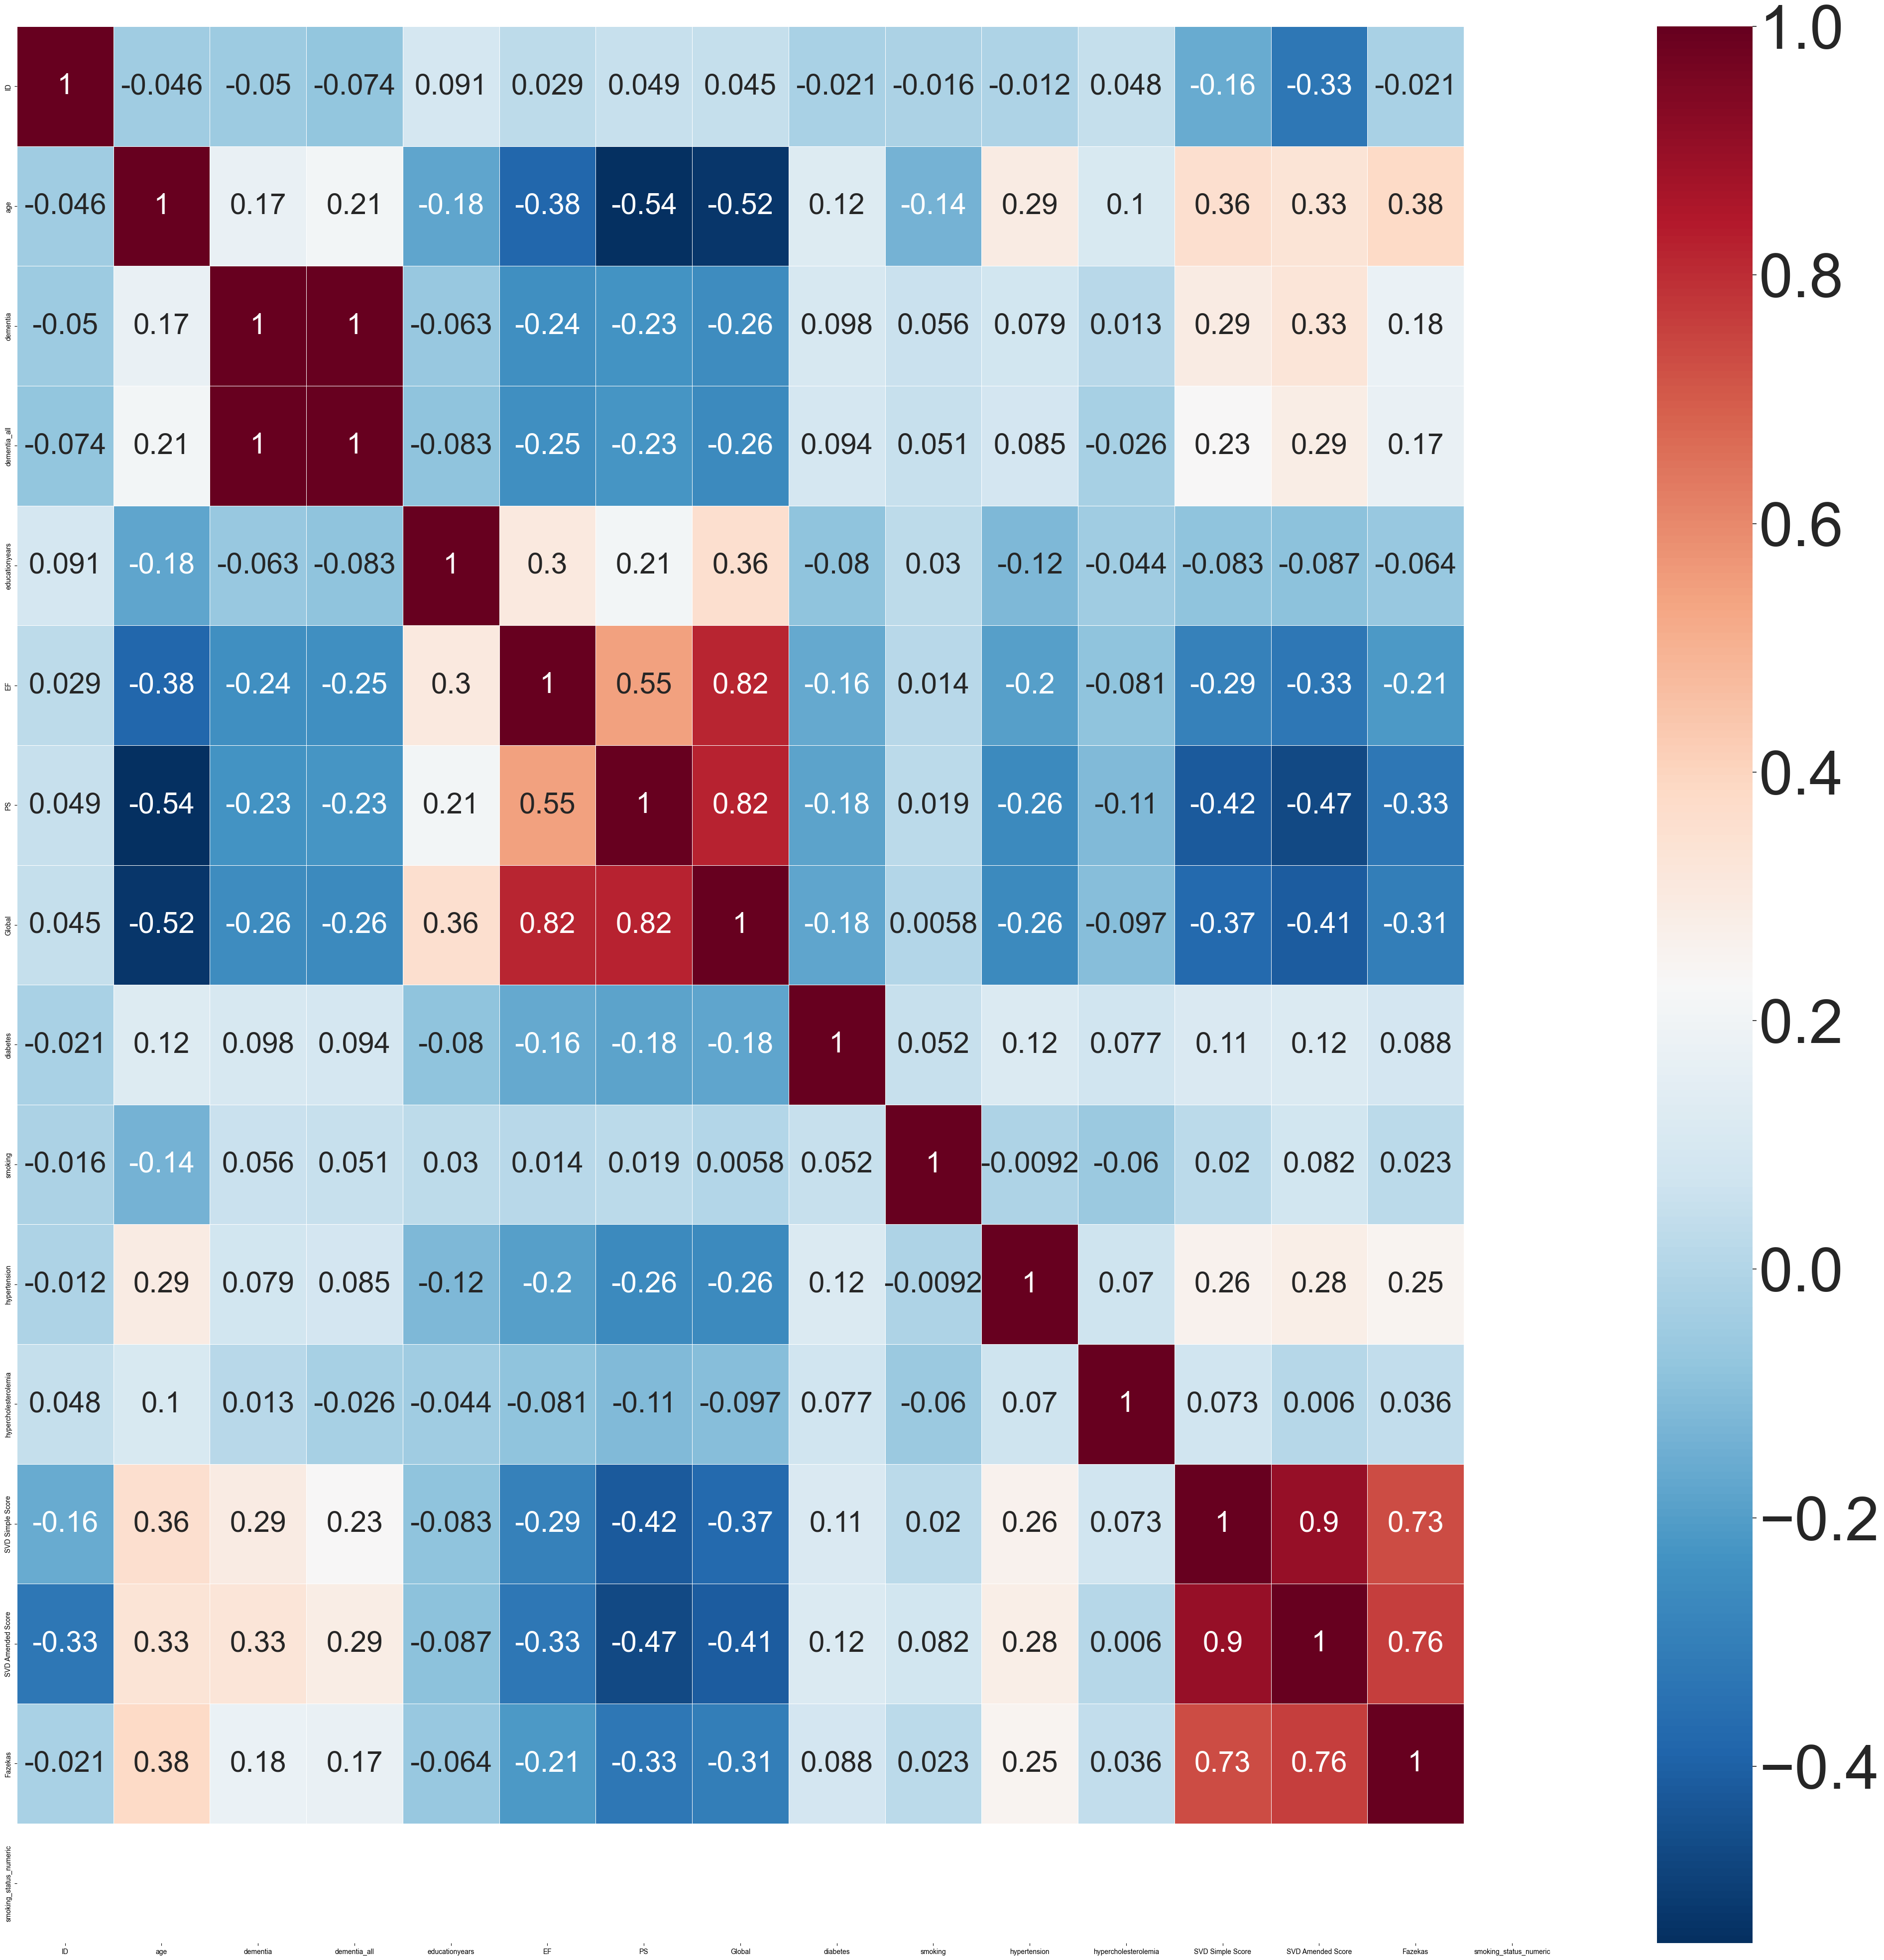

In [26]:
fig, ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=8.0)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax, annot_kws={"size":42},)


The Pearson Correlation Matrix, visualized as a heat map, shows the correlations between the features in the dataset. We did so to gather an understanding of which features in the dataset that might have the most impact on dementia_all, as this is the feature we want to be able to predict. 

The dataset is still consisting of nominal and categorical datatypes, hence to use the nominal data for modeling, we need to transform it to numerical data. 

## <font color=green> 3. Cleaning the dataset 2.0 </font> ##

In [27]:
#Overvej at sætte den her længere ned til de andre. Eller flytte de andre herop. 
dementia_data.replace({"gender":{"female" : 0, "male" : 1}}, inplace=True)

/var/folders/_7/qfzsb2m168gd8fj4j2bnvgn00000gn/T/ipykernel_26464/1742680412.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dementia_data.replace({"gender":{"female" : 0, "male" : 1}}, inplace=True)


In [28]:
dementia_data

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count,smoking_status_numeric
0,1,52.67,1,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,2,1,1,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1,NaN
1,10,64.58,1,0.0,0,10.0,1.280000,0.360000,0.744000,0,1,1,1,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1,NaN
2,100,74.92,1,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,0,1,1,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0,NaN
3,101,74.83,1,1.0,1,9.0,NaN,-2.136271,-1.301102,0,2,1,1,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0,NaN
4,102,79.25,1,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,1,1,1,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67.00,0,0.0,0,13.0,-0.100000,-0.020000,-0.260000,0,0,1,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,0,Zero,0,NaN
1838,990,71.00,0,0.0,0,13.0,-0.370000,-1.060000,-1.003333,0,0,1,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0,NaN
1839,991,55.00,1,0.0,0,10.0,0.460000,0.960000,0.610000,0,1,0,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0,NaN
1840,995,54.00,1,0.0,0,10.0,0.190000,0.030000,0.590000,0,1,0,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,1,Zero,0,NaN


Our target feature is *dementia_all*. This feature is want we aim to predict with our model and given the correlation with the other features. *dementia_all* is a duplication of the feature *dementia*. However, *dementia* contains 34 missing values (NaN), whereas these values has been assigned with the value 1 in the feature *dementia_all*. 


with the argument of creating a model that rather predicts a false positive than a false negative <font color = yellow> (source????) </font>, *dementia_all* are chosen as the target feature, which is the same argument for creating the colum in the first place and assigning the missing values with the value 1, in stead of dropping the 34 rows containing missing values. 

In order to include the different feature in our correlation matrix later on, we transform the datatypes of the features containing objects as datatypes. 

In [53]:
dementia_data.rename(columns={"SVD Simple Score": "svd_simple_score", "SVD Amended Score": "svd_amended_score"})

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,svd_simple_score,svd_amended_score,Fazekas,lac_count,CMB_count,smoking_status_numeric
0,1,52.67,1,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,2,1,1,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1,NaN
1,10,64.58,1,0.0,0,10.0,1.280000,0.360000,0.744000,0,1,1,1,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1,NaN
2,100,74.92,1,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,0,1,1,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0,NaN
3,101,74.83,1,1.0,1,9.0,NaN,-2.136271,-1.301102,0,2,1,1,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0,NaN
4,102,79.25,1,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,1,1,1,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67.00,0,0.0,0,13.0,-0.100000,-0.020000,-0.260000,0,0,1,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,0,Zero,0,NaN
1838,990,71.00,0,0.0,0,13.0,-0.370000,-1.060000,-1.003333,0,0,1,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0,NaN
1839,991,55.00,1,0.0,0,10.0,0.460000,0.960000,0.610000,0,1,0,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0,NaN
1840,995,54.00,1,0.0,0,10.0,0.190000,0.030000,0.590000,0,1,0,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,1,Zero,0,NaN


By deciding on using *dementia_all* as the target feature, we are no longer in need of the *dementia*, hence this will be removed from the dataset. Furthermore, the two features *study* and *study1* is once again a duplikation of information of which study the information came from. The *study1* column does not include new information, hence its purpose in this study and development of a model to predict dementia, the feature is not relevant. 

<font color = yellow>   </font>

In [69]:
dementia_data.drop("dementia", axis=1, inplace=True)



KeyError: "['dementia'] not found in axis"

In [70]:
dementia_data.drop("study1", axis=1, inplace=True)
dementia_data.drop("ID", axis=1, inplace=True)

In [71]:
dementia_data

,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count,smoking_status_numeric
0,52.67,1,0,11.0,-2.403333,-1.290000,-1.287000,0,2,1,1,more-than-zero,2 to 3,scans,3.0,7.0,3,>5,>=1,NaN
1,64.58,1,0,10.0,1.280000,0.360000,0.744000,0,1,1,1,more-than-zero,0 to 1,scans,2.0,3.0,1,1 to 2,>=1,NaN
2,74.92,1,0,8.0,-1.440000,-1.520000,-0.922000,0,0,1,1,more-than-zero,0 to 1,scans,1.0,2.0,1,1 to 2,0,NaN
3,74.83,1,1,9.0,-0.063088,-2.136271,-1.301102,0,2,1,1,more-than-zero,2 to 3,scans,2.0,4.0,2,3 to 5,0,NaN
4,79.25,1,0,10.0,-0.920000,-1.493333,-0.924000,0,1,1,1,more-than-zero,2 to 3,scans,2.0,3.0,2,1 to 2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,67.00,0,0,13.0,-0.100000,-0.020000,-0.260000,0,0,1,1,zero,0 to 1,ASPS-elderly,0.0,0.0,0,Zero,0,NaN
1838,71.00,0,0,13.0,-0.370000,-1.060000,-1.003333,0,0,1,1,zero,0 to 1,ASPS-elderly,0.0,0.0,1,Zero,0,NaN
1839,55.00,1,0,10.0,0.460000,0.960000,0.610000,0,1,0,1,zero,0 to 1,ASPS-elderly,0.0,0.0,0,Zero,0,NaN
1840,54.00,1,0,10.0,0.190000,0.030000,0.590000,0,1,0,1,zero,0 to 1,ASPS-elderly,0.0,0.0,1,Zero,0,NaN


In [44]:

dementia_data['lac_count'].unique()

array(['>5', '1 to 2', '3 to 5', 'Zero'], dtype=object)

In [73]:

dementia_data['fazekas_cat'].unique()

array(['2 to 3', '0 to 1'], dtype=object)

In [30]:
dementia_data['lacunes_num'].unique()

array(['more-than-zero', 'zero'], dtype=object)

In [54]:
dementia_data['SVD Simple Score'].unique()

array([ 3.,  2.,  1.,  0., nan])

In [55]:
dementia_data['SVD Amended Score'].unique()

array([ 7.,  3.,  2.,  4.,  1.,  6.,  5.,  0., nan])

As we found out earlier on, a magnificicant amount of rows (677) contains missing values (NaN) within the feature *'SVD simple score'* and *'SVD Amended Score'*. As these features indicates the results of patient's MRI scan. Hence, it is assumed that the patient's whose rows include NaN values within theses features, have not been scanned, which serves as an argument of filling these missing values with the value of 0. Taken the assumption, that patients will not require a MRI scan unless they are showing symptoms, into account. 

In [59]:
dementia_data['SVD Simple Score'].fillna(dementia_data['SVD Simple Score'].mode()[0], inplace = True)
dementia_data['SVD Amended Score'].fillna(dementia_data['SVD Amended Score'].mode()[0], inplace = True)


/var/folders/_7/qfzsb2m168gd8fj4j2bnvgn00000gn/T/ipykernel_26464/71824731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dementia_data['SVD Simple Score'].fillna(dementia_data['SVD Simple Score'].mode()[0], inplace = True)
/var/folders/_7/qfzsb2m168gd8fj4j2bnvgn00000gn/T/ipykernel_26464/71824731.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interm

In [61]:
#Just checking that the code worked, there are no more NaN values included in the feature. 
dementia_data['SVD Simple Score'].unique()

array([3., 2., 1., 0.])

In [63]:
dementia_data['smoking'].fillna(dementia_data['smoking'].mode()[0], inplace = True)

/var/folders/_7/qfzsb2m168gd8fj4j2bnvgn00000gn/T/ipykernel_26464/1827697556.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dementia_data['smoking'].fillna(dementia_data['smoking'].mode()[0], inplace = True)


As well within the features *EF*, *PS* and *Global* there is a noticeable amount of missing values (respectively 208, 268, and 308). The same argument as above-mentioned does not apply to these features as EF (Executive function), PS (Processing Speed), and Global (Global Cognitive Score) are not 0 as the patients would then have no EF, PS, and Global. In stead we replace the NaN values in these three features with the mean of the values included in the respective features.

In [64]:
dementia_data['EF'].fillna(dementia_data['EF'].mean(), inplace = True)
dementia_data['PS'].fillna(dementia_data['PS'].mean(), inplace = True)
dementia_data['Global'].fillna(dementia_data['Global'].mean(), inplace = True)

/var/folders/_7/qfzsb2m168gd8fj4j2bnvgn00000gn/T/ipykernel_26464/3183005476.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dementia_data['EF'].fillna(dementia_data['EF'].mean(), inplace = True)
/var/folders/_7/qfzsb2m168gd8fj4j2bnvgn00000gn/T/ipykernel_26464/3183005476.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [65]:
#Just checking whether we managed to exclude missing values 
dementia_data.isna().sum()

ID                           0
age                          0
gender                       0
dementia                    34
dementia_all                 0
educationyears               0
EF                           0
PS                           0
Global                       0
diabetes                     0
smoking                      0
hypertension                 0
hypercholesterolemia         0
lacunes_num                  0
fazekas_cat                  0
study                        0
study1                       0
SVD Simple Score             0
SVD Amended Score            0
Fazekas                      0
lac_count                    0
CMB_count                    0
smoking_status_numeric    1842
dtype: int64

,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count,smoking_status_numeric
0,52.67,1,0,11.0,-2.403333,-1.290000,-1.287000,0,2,1,1,more-than-zero,2 to 3,scans,3.0,7.0,3,>5,>=1,NaN
1,64.58,1,0,10.0,1.280000,0.360000,0.744000,0,1,1,1,more-than-zero,0 to 1,scans,2.0,3.0,1,1 to 2,>=1,NaN
2,74.92,1,0,8.0,-1.440000,-1.520000,-0.922000,0,0,1,1,more-than-zero,0 to 1,scans,1.0,2.0,1,1 to 2,0,NaN
3,74.83,1,1,9.0,-0.063088,-2.136271,-1.301102,0,2,1,1,more-than-zero,2 to 3,scans,2.0,4.0,2,3 to 5,0,NaN
4,79.25,1,0,10.0,-0.920000,-1.493333,-0.924000,0,1,1,1,more-than-zero,2 to 3,scans,2.0,3.0,2,1 to 2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,67.00,0,0,13.0,-0.100000,-0.020000,-0.260000,0,0,1,1,zero,0 to 1,ASPS-elderly,0.0,0.0,0,Zero,0,NaN
1838,71.00,0,0,13.0,-0.370000,-1.060000,-1.003333,0,0,1,1,zero,0 to 1,ASPS-elderly,0.0,0.0,1,Zero,0,NaN
1839,55.00,1,0,10.0,0.460000,0.960000,0.610000,0,1,0,1,zero,0 to 1,ASPS-elderly,0.0,0.0,0,Zero,0,NaN
1840,54.00,1,0,10.0,0.190000,0.030000,0.590000,0,1,0,1,zero,0 to 1,ASPS-elderly,0.0,0.0,1,Zero,0,NaN


In [75]:
dementia_data.replace({"lacunes_num": {"zero": 0, "more_than_zero": 1}}, inplace=True)
dementia_data.replace({"fazrkas_cat": {"0 to 1": 0, "2 to 3": 1}}, inplace=True)